In [111]:
# Data Imports
import numpy as np
import pandas as pd


# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [112]:
# Reading csv files
games_women = pd.read_csv('athletes-women.csv')
games_men = pd.read_csv('athletes-men.csv')
athletes = pd.read_csv('athletes-all.csv')

# athletes who made it into the games
games_all = pd.concat([games_women, games_men])
games_women = games_women.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])
games_men = games_men.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [113]:
df = athletes.merge(games_all.drop_duplicates(), on=['athlete_id'],
                   how='left', indicator=True)

In [114]:
# taking only the columns we want
df_all = df[['athlete_id', 'age_x', 'gender', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', '_merge', 'train', 'experience', 'schedule', 'howlong_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x']]
df_all = df_all.dropna()

df_all_women = df_all.loc[df_all['gender'] == 'Female']
df_all_men = df_all.loc[df_all['gender'] == 'Male']

In [115]:
# ones who have not made it who have stats filled out, temp while cleaning up
def make_columns_numeric(df):    
    not_make = df.loc[df['_merge'] == 'left_only']
    not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)

    col         = 'howlong_x'
    conditions  = [ not_make[col].str.contains("Less"), not_make[col].str.contains("6-12"), not_make[col].str.contains("1-2"), not_make[col].str.contains("2-4"), not_make[col].str.contains("4+") ]
    choices     = [0,1,2,3,4]

    not_make["howlong"] = np.select(conditions, choices)

    not_make['coach'] = np.where(not_make['train'].str.contains("have a coach"), 1, 0)
    not_make['certification'] = np.where(not_make['experience'].str.contains("Level 1"), 1, 0)
    not_make['multiple'] = np.where(not_make['schedule'].str.contains("multiple workouts"), 1, 0)

    return not_make

not_make_women = make_columns_numeric(df_all_women)
not_make_men = make_columns_numeric(df_all_men)


/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_12425/313657988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)
/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_12425/313657988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make["howlong"] = np.select(conditions, choices)
/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_12425/313657988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

In [116]:
#not_in_games will contain all athletes that did not make it, with stats, with cleaned up columns
not_in_games_women = not_make_women[['athlete_id', 'age_x', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x','howlong','coach','certification','multiple']]
not_in_games_men = not_make_men[['athlete_id', 'age_x', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x','howlong','coach','certification','multiple']]
not_in_games_women.rename(columns={"age_x": "age",'height_x': 'height', 'weight_x':'weight', 'fran_x':'fran', 'run5k_x':'run5k','pullups_x':'pullups', 'run400_x':'run400', 'candj_x':'candj', 'snatch_x':'snatch', 'deadlift_x':'deadlift', 'backsq_x':'backsq'}, inplace = True)
not_in_games_men.rename(columns={"age_x": "age",'height_x': 'height', 'weight_x':'weight', 'fran_x':'fran', 'run5k_x':'run5k','pullups_x':'pullups', 'run400_x':'run400', 'candj_x':'candj', 'snatch_x':'snatch', 'deadlift_x':'deadlift', 'backsq_x':'backsq'}, inplace = True)

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [117]:
#Min and Max of women
#On August 31st, Marisa Flowers performed the CrossFit® WOD “Fran” in 1 minute 53 seconds.
not_in_games_women2 = not_in_games_women.loc[(not_in_games_women["height"] <= 108) & (not_in_games_women["weight"] <= 1400) &(not_in_games_women["fran"] <= 600) & (not_in_games_women["fran"] >= 113) & (not_in_games_women["run400"] <= 180)]
not_in_games_women2.agg([min, max])



,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
min,1659.0,15.0,1.0,55.0,125.0,480.0,0.0,51.0,0.0,0.0,0.0,0.0,0,0,0,0
max,591544.0,55.0,74.0,235.0,600.0,2565.0,100.0,170.0,355.0,285.0,606.0,551.0,4,1,1,1


In [118]:
#Min and Max of men
not_in_games_men2 = not_in_games_men.loc[(not_in_games_men["height"] <= 100) & (not_in_games_men["height"] >= 50) & (not_in_games_men["weight"] <= 300) & (not_in_games_men["weight"] >= 100) &(not_in_games_men["fran"] <= 600) & (not_in_games_men["fran"] >= 113) & (not_in_games_men["run400"] <= 180) & (not_in_games_men["run5k"] <= 3600) & (not_in_games_men["pullups"] <= 100) &(not_in_games_men["backsq"] <= 1157) &(not_in_games_men["deadlift"] <= 1105)]
not_in_games_men2.agg([min, max])



,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
min,86.0,14.0,55.0,101.0,115.0,60.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0,0,0
max,623866.0,56.0,82.0,300.0,600.0,3562.0,100.0,180.0,428.0,500.0,717.0,675.0,4,1,1,1


In [119]:
games_women['in_games'] = 1
games_men['in_games'] = 1
not_in_games_women2['in_games'] = 0
not_in_games_men2['in_games'] = 0

/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_12425/284151674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_in_games_women2['in_games'] = 0
/var/folders/1_/slt2s8nn5cxcjxnzwzm7bn2m0000gn/T/ipykernel_12425/284151674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_in_games_men2['in_games'] = 0


In [120]:
df_women = not_in_games_women2.append(games_women)
df_men = not_in_games_men2.append(games_men)

In [121]:
df_women

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple,in_games
64482,4496.0,32.0,66.0,135.0,264.0,1355.0,36.0,75.0,165.0,125.0,266.0,195.0,3,1,0,0,0
97672,156632.0,32.0,69.0,185.0,455.0,2172.0,20.0,137.0,115.0,85.0,205.0,155.0,2,0,0,0,0
144480,399629.0,40.0,64.0,168.0,380.0,1753.0,6.0,108.0,140.0,90.0,295.0,225.0,2,1,0,1,0
159571,9121.0,29.0,64.0,135.0,159.0,1195.0,44.0,65.0,210.0,163.0,330.0,270.0,4,1,1,1,0
159574,11210.0,34.0,61.0,130.0,164.0,1269.0,37.0,70.0,173.0,138.0,333.0,253.0,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,109196.0,53.0,62.0,130.0,396.0,1224.0,40.0,65.0,135.0,90.0,280.0,165.0,4,1,0,1,1
221,343033.0,20.0,65.0,134.0,405.0,1630.0,28.0,79.0,139.0,143.0,254.0,209.0,2,0,0,0,1
222,131677.0,22.0,65.0,147.0,554.0,1525.0,25.0,69.0,155.0,125.0,255.0,205.0,1,1,0,1,1
223,13560.0,50.0,62.0,159.0,235.0,1353.0,51.0,71.0,155.0,125.0,270.0,225.0,3,0,0,1,1


In [122]:
df_men

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple,in_games
12,11416.0,31.0,65.0,150.0,119.0,1211.0,81.0,61.0,290.0,225.0,465.0,405.0,3,0,1,1,0
101,2414.0,44.0,69.0,168.0,175.0,1470.0,34.0,85.0,245.0,185.0,435.0,405.0,4,0,0,0,0
102,2720.0,24.0,68.0,180.0,126.0,1302.0,80.0,58.0,315.0,240.0,475.0,405.0,3,1,1,1,0
110,6922.0,31.0,67.0,150.0,244.0,1268.0,42.0,63.0,230.0,175.0,410.0,330.0,3,0,1,1,0
115,12244.0,34.0,69.0,185.0,183.0,1188.0,51.0,62.0,275.0,215.0,530.0,450.0,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,521299.0,51.0,69.0,178.0,203.0,1260.0,55.0,66.0,255.0,165.0,425.0,330.0,2,1,1,1,1
282,47551.0,41.0,70.0,179.0,339.0,1241.0,55.0,68.0,225.0,185.0,345.0,305.0,0,0,1,0,1
283,407586.0,47.0,70.0,217.0,390.0,1806.0,34.0,72.0,315.0,245.0,485.0,420.0,0,1,0,0,1
284,250862.0,54.0,67.0,167.0,188.0,1344.0,55.0,74.0,230.0,170.0,405.0,345.0,0,0,0,0,1


# Histograms

## Men

In [123]:
#Men
df_men.groupby('in_games').mean()

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
in_games,,,,,,,,,,,,,,,,
0,107287.872842,32.970953,70.482836,188.217957,264.594353,1332.421491,36.984156,68.911030,241.223847,185.524274,422.766606,343.141987,2.728418,0.331911,0.476539,0.554337
1,143346.178322,36.479021,69.695804,188.664336,170.632867,1276.590909,58.493007,63.611888,293.360140,235.101399,478.388112,407.590909,1.405594,0.391608,0.632867,0.702797


In [124]:
#Separating in and not in games
df_men_ingames = df_men.loc[df_men['in_games'] == 1]
df_men_nogames = df_men.loc[df_men['in_games'] == 0]

### Age

Text(0.5, 1.0, 'Overlapping plots')

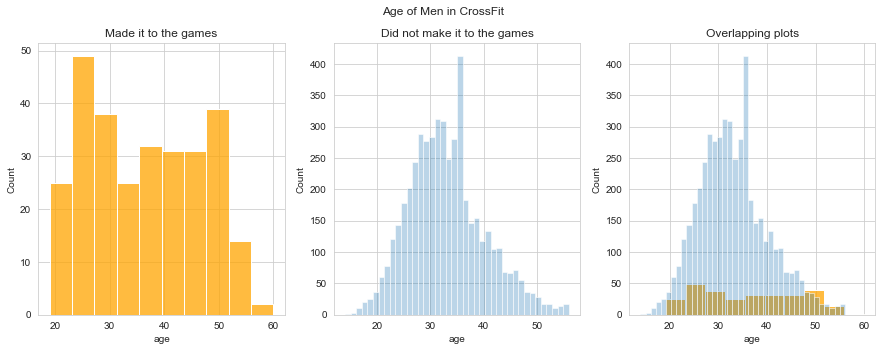

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Age of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="age", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="age", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="age", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="age", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Weight

Text(0.5, 1.0, 'Overlapping plots')

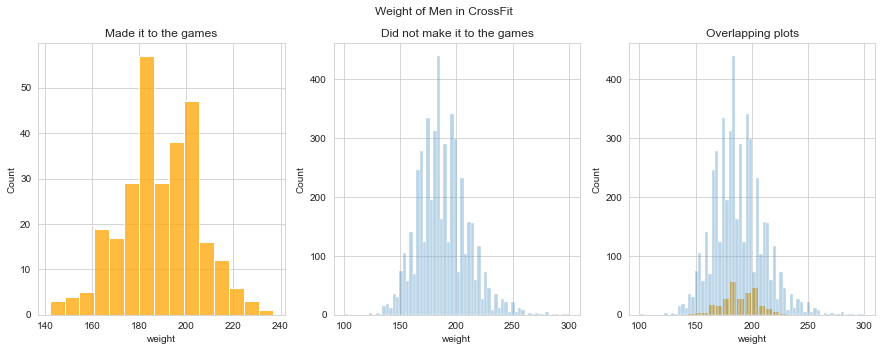

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Weight of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="weight", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="weight", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="weight", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="weight", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Height

Text(0.5, 1.0, 'Overlapping plots')

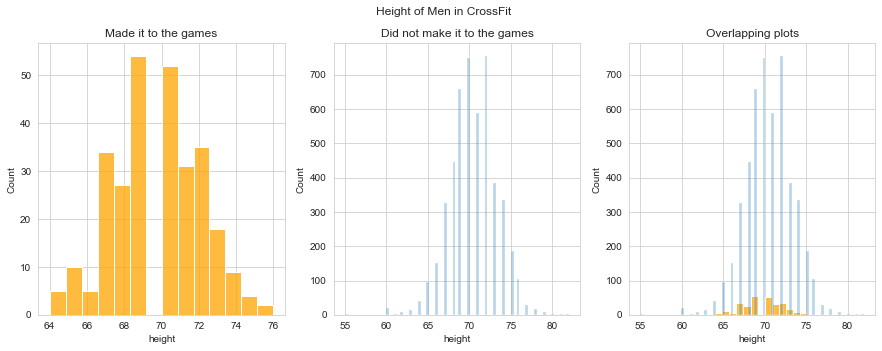

In [127]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Height of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="height", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="height", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="height", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="height", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run5k

Text(0.5, 1.0, 'Overlapping plots')

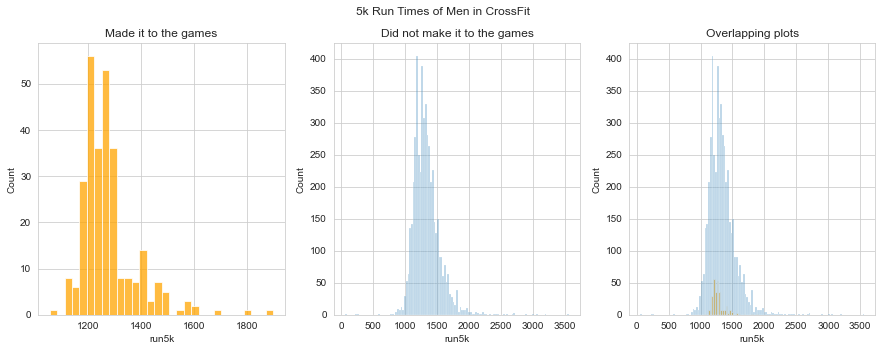

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('5k Run Times of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="run5k", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="run5k", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="run5k", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="run5k", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run400

Text(0.5, 1.0, 'Overlapping plots')

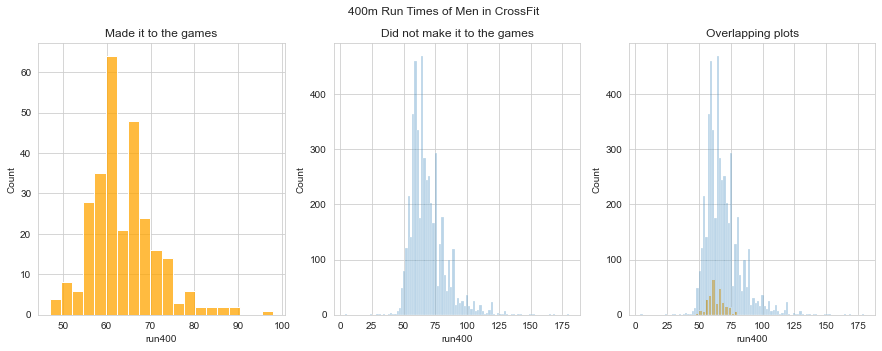

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('400m Run Times of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="run400", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="run400", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="run400", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="run400", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Clean and Jerk (candj)

Text(0.5, 1.0, 'Overlapping plots')

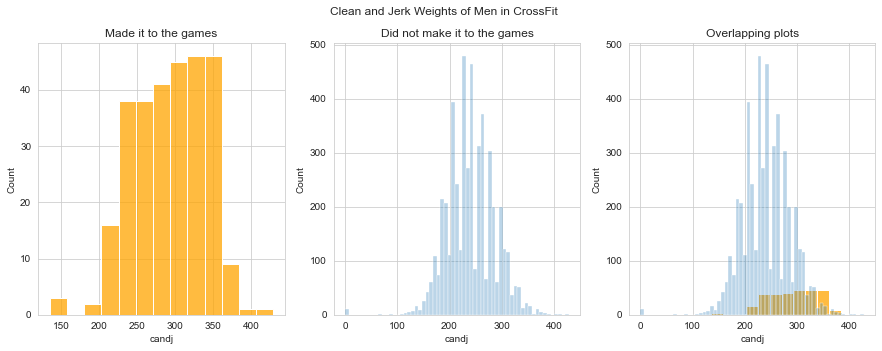

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Clean and Jerk Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="candj", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="candj", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="candj", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="candj", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Snatch

Text(0.5, 1.0, 'Overlapping plots')

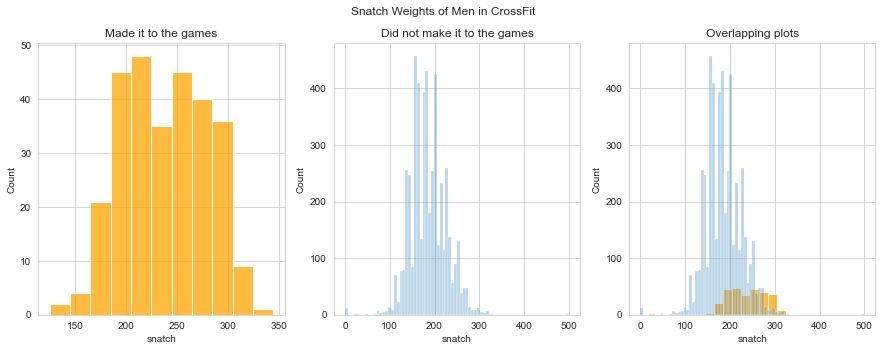

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Snatch Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="snatch", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="snatch", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="snatch", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="snatch", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Back Squat (backsq)

Text(0.5, 1.0, 'Overlapping plots')

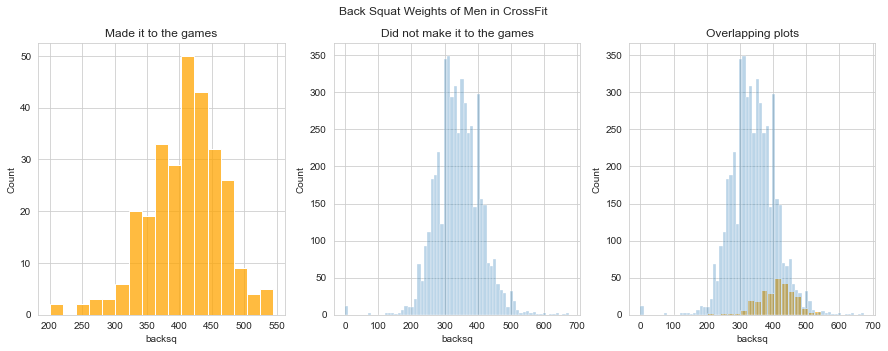

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Back Squat Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="backsq", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="backsq", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="backsq", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="backsq", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Deadlift

Text(0.5, 1.0, 'Overlapping plots')

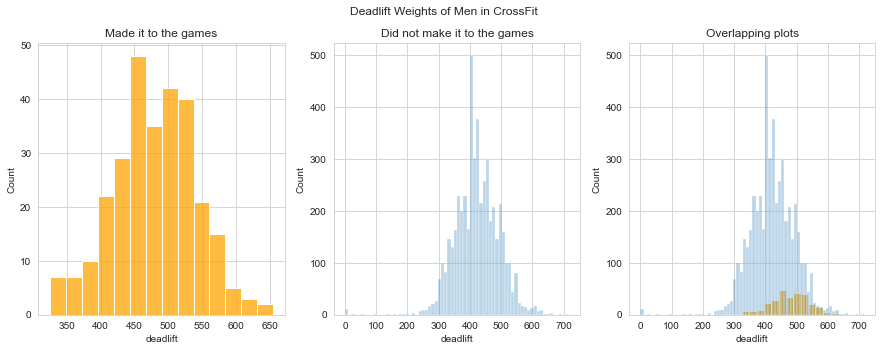

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Deadlift Weights of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="deadlift", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="deadlift", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="deadlift", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="deadlift", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Pullups

Text(0.5, 1.0, 'Overlapping plots')

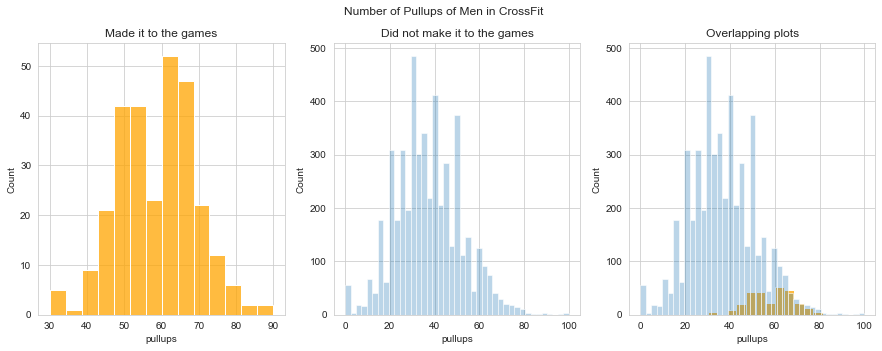

In [134]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Number of Pullups of Men in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_men_ingames, x="pullups", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_men_nogames, x="pullups", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_men_ingames, x="pullups", color="orange")
sns.histplot(ax=axes[2],data=df_men_nogames, x="pullups", alpha=0.3)
axes[2].set_title("Overlapping plots")

## Women

In [135]:
df_women.groupby('in_games').mean()

,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
in_games,,,,,,,,,,,,,,,,
0,96608.182013,33.353319,64.771949,140.465739,325.792291,1486.800857,23.798715,83.182013,151.480728,114.58137,268.898287,213.599572,2.944325,0.436831,0.517131,0.490364
1,169867.066667,36.631111,64.808889,140.288889,199.937778,1323.351111,43.186667,81.320000,190.804444,150.48000,315.257778,260.591111,2.986667,0.635556,0.591111,0.666667


In [136]:
#Separating in and not in games
df_women_ingames = df_women.loc[df_women['in_games'] == 1]
df_women_nogames = df_women.loc[df_women['in_games'] == 0]

### Age

Text(0.5, 1.0, 'Overlapping plots')

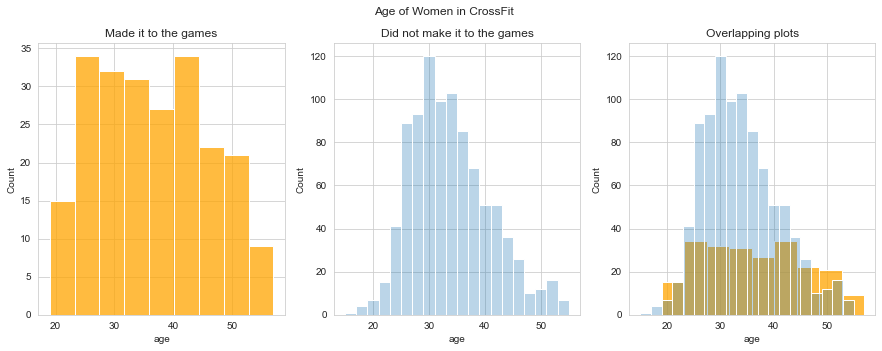

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Age of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="age", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="age", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="age", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="age", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Weight

Text(0.5, 1.0, 'Overlapping plots')

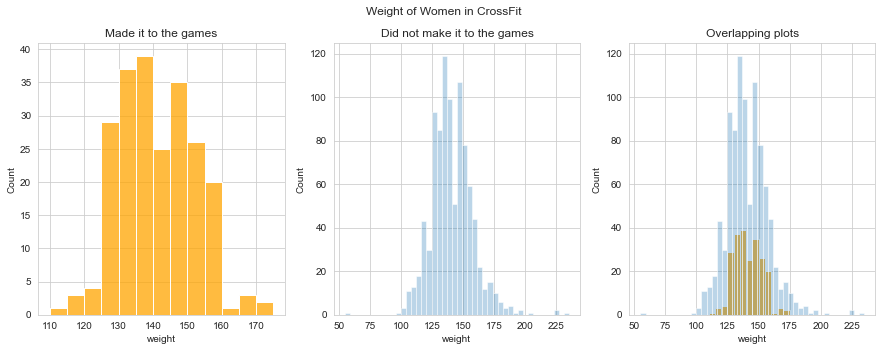

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Weight of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="weight", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="weight", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="weight", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="weight", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Height

Text(0.5, 1.0, 'Overlapping plots')

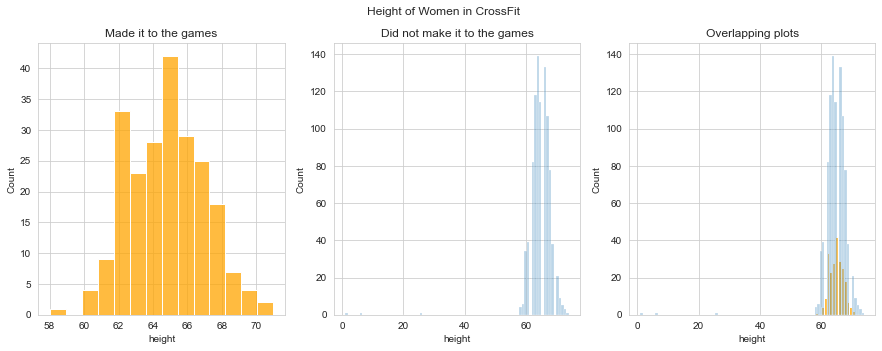

In [139]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Height of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="height", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="height", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="height", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="height", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run5k

Text(0.5, 1.0, 'Overlapping plots')

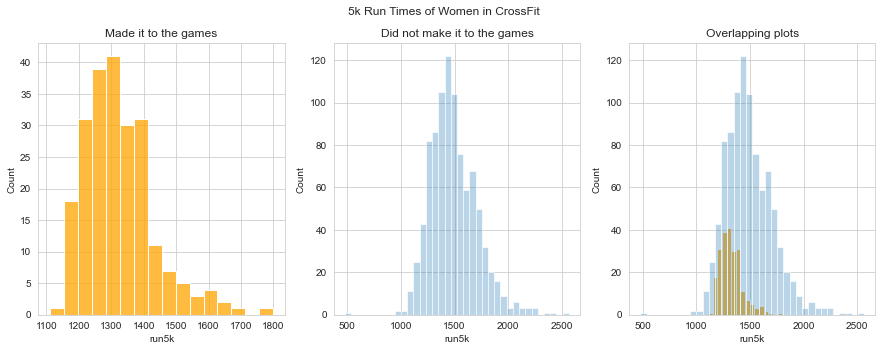

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('5k Run Times of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="run5k", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="run5k", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="run5k", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="run5k", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run400

Text(0.5, 1.0, 'Overlapping plots')

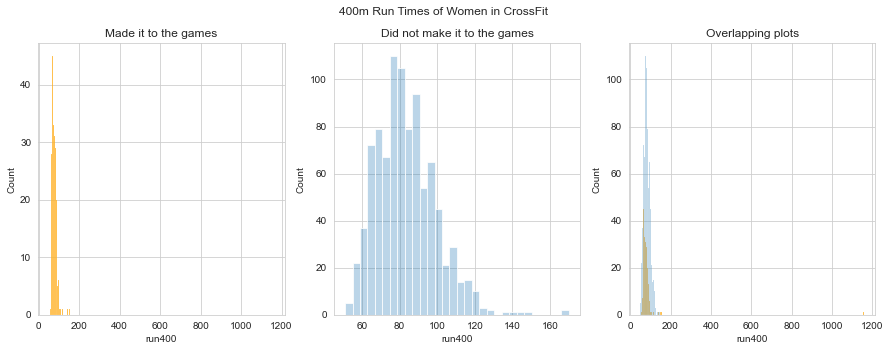

In [141]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('400m Run Times of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="run400", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="run400", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="run400", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="run400", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Clean and Jerk (candj)

Text(0.5, 1.0, 'Overlapping plots')

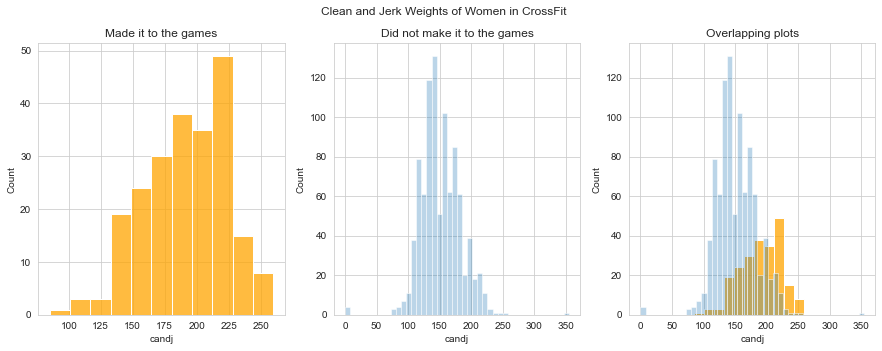

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Clean and Jerk Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="candj", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="candj", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="candj", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="candj", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Snatch

Text(0.5, 1.0, 'Overlapping plots')

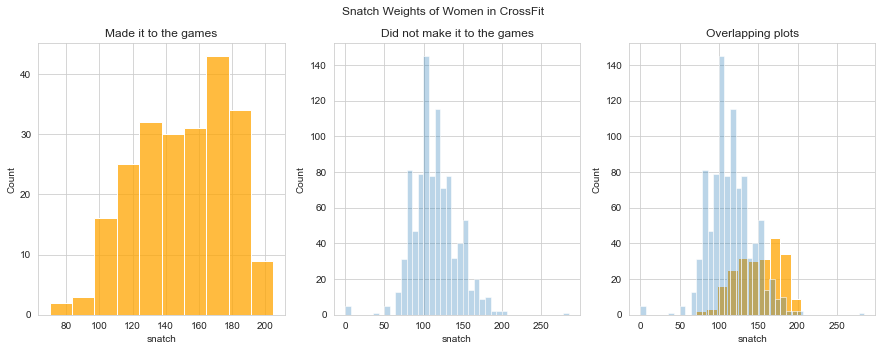

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Snatch Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="snatch", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="snatch", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="snatch", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="snatch", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Back Squat (backsq)

Text(0.5, 1.0, 'Overlapping plots')

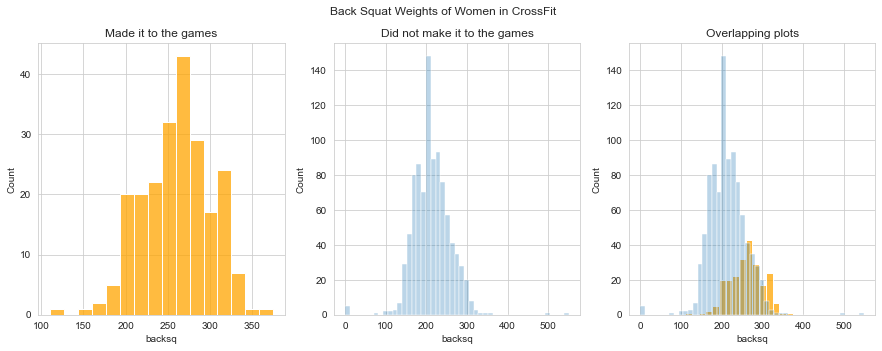

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Back Squat Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="backsq", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="backsq", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="backsq", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="backsq", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Deadlift

Text(0.5, 1.0, 'Overlapping plots')

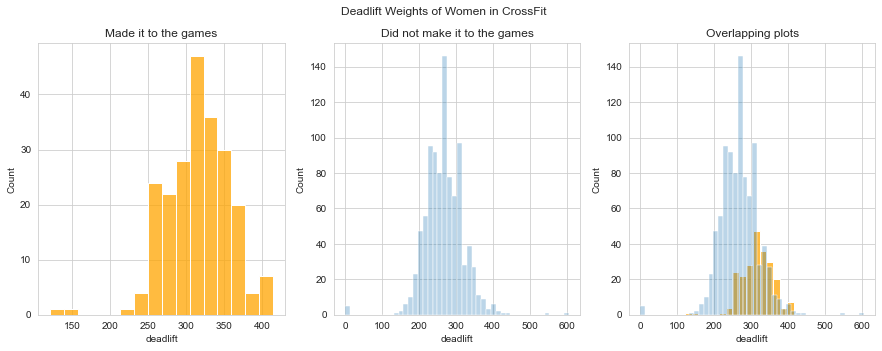

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Deadlift Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="deadlift", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="deadlift", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="deadlift", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="deadlift", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Pullups

Text(0.5, 1.0, 'Overlapping plots')

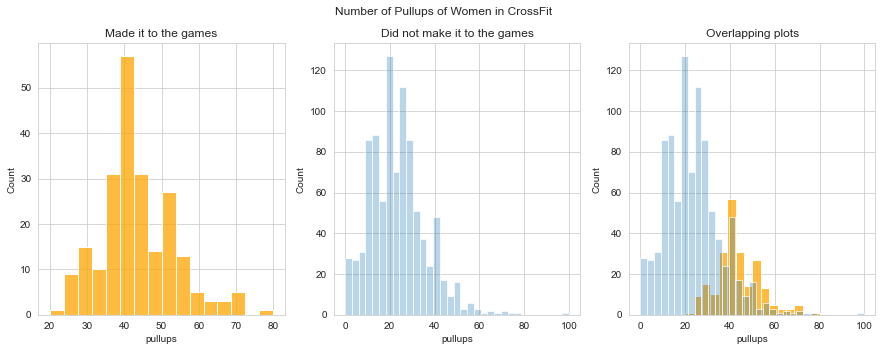

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Number of Pullups of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="pullups", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="pullups", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="pullups", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="pullups", alpha=0.3)
axes[2].set_title("Overlapping plots")